/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


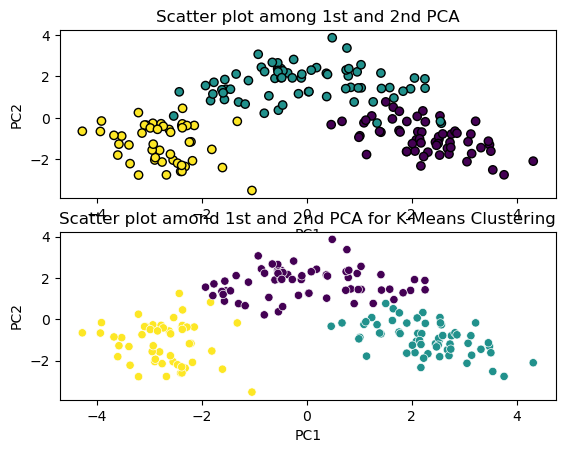

Optimal number of principal components: 10


In [12]:
# Load the dataset
data = pd.read_csv('wine.data', header=None)

# Split the dataset into features and target variables
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA on the preprocessed dataset using the scikit-learn library
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components to retain based on the explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
optimal_n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Visualise the results of PCA using a scatter plot
plt.subplot(2,1,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Scatter plot among 1st and 2nd PCA")


# Perform clustering on the PCA-transformed data using K-Means clustering algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca[:, :optimal_n_components])
y_pred = kmeans.predict(X_pca[:, :optimal_n_components])

plt.subplot(2,1,2)
sns.scatterplot(data = X_pca, x = X_pca[:, 0], y = X_pca[:, 1], c = y_pred, edgecolors = 'k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Scatter plot amond 1st and 2nd PCA for K-Means Clustering")
plt.show()

# Interpret the results of PCA and clustering analysis
print(f'Optimal number of principal components: {optimal_n_components}')

